In [1]:
# Stock Prediction using LSTM for TCS Stock Historical Data in CSV format

In [275]:
import np
# Importing pandas library
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('TCS_stock_history.csv')

In [219]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0
...,...,...,...,...,...,...,...,...
4458,2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,2320754,0.0,0.0
4459,2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,1673362,0.0,0.0
4460,2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,2253075,0.0,0.0
4461,2021-09-29,3759.800049,3806.000000,3722.149902,3791.899902,2489161,0.0,0.0


In [220]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
std,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842
min,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000


In [221]:
# Converting String to Datetime Format
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0
...,...,...,...,...,...,...,...,...
4458,2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,2320754,0.0,0.0
4459,2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,1673362,0.0,0.0
4460,2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,2253075,0.0,0.0
4461,2021-09-29,3759.800049,3806.000000,3722.149902,3791.899902,2489161,0.0,0.0


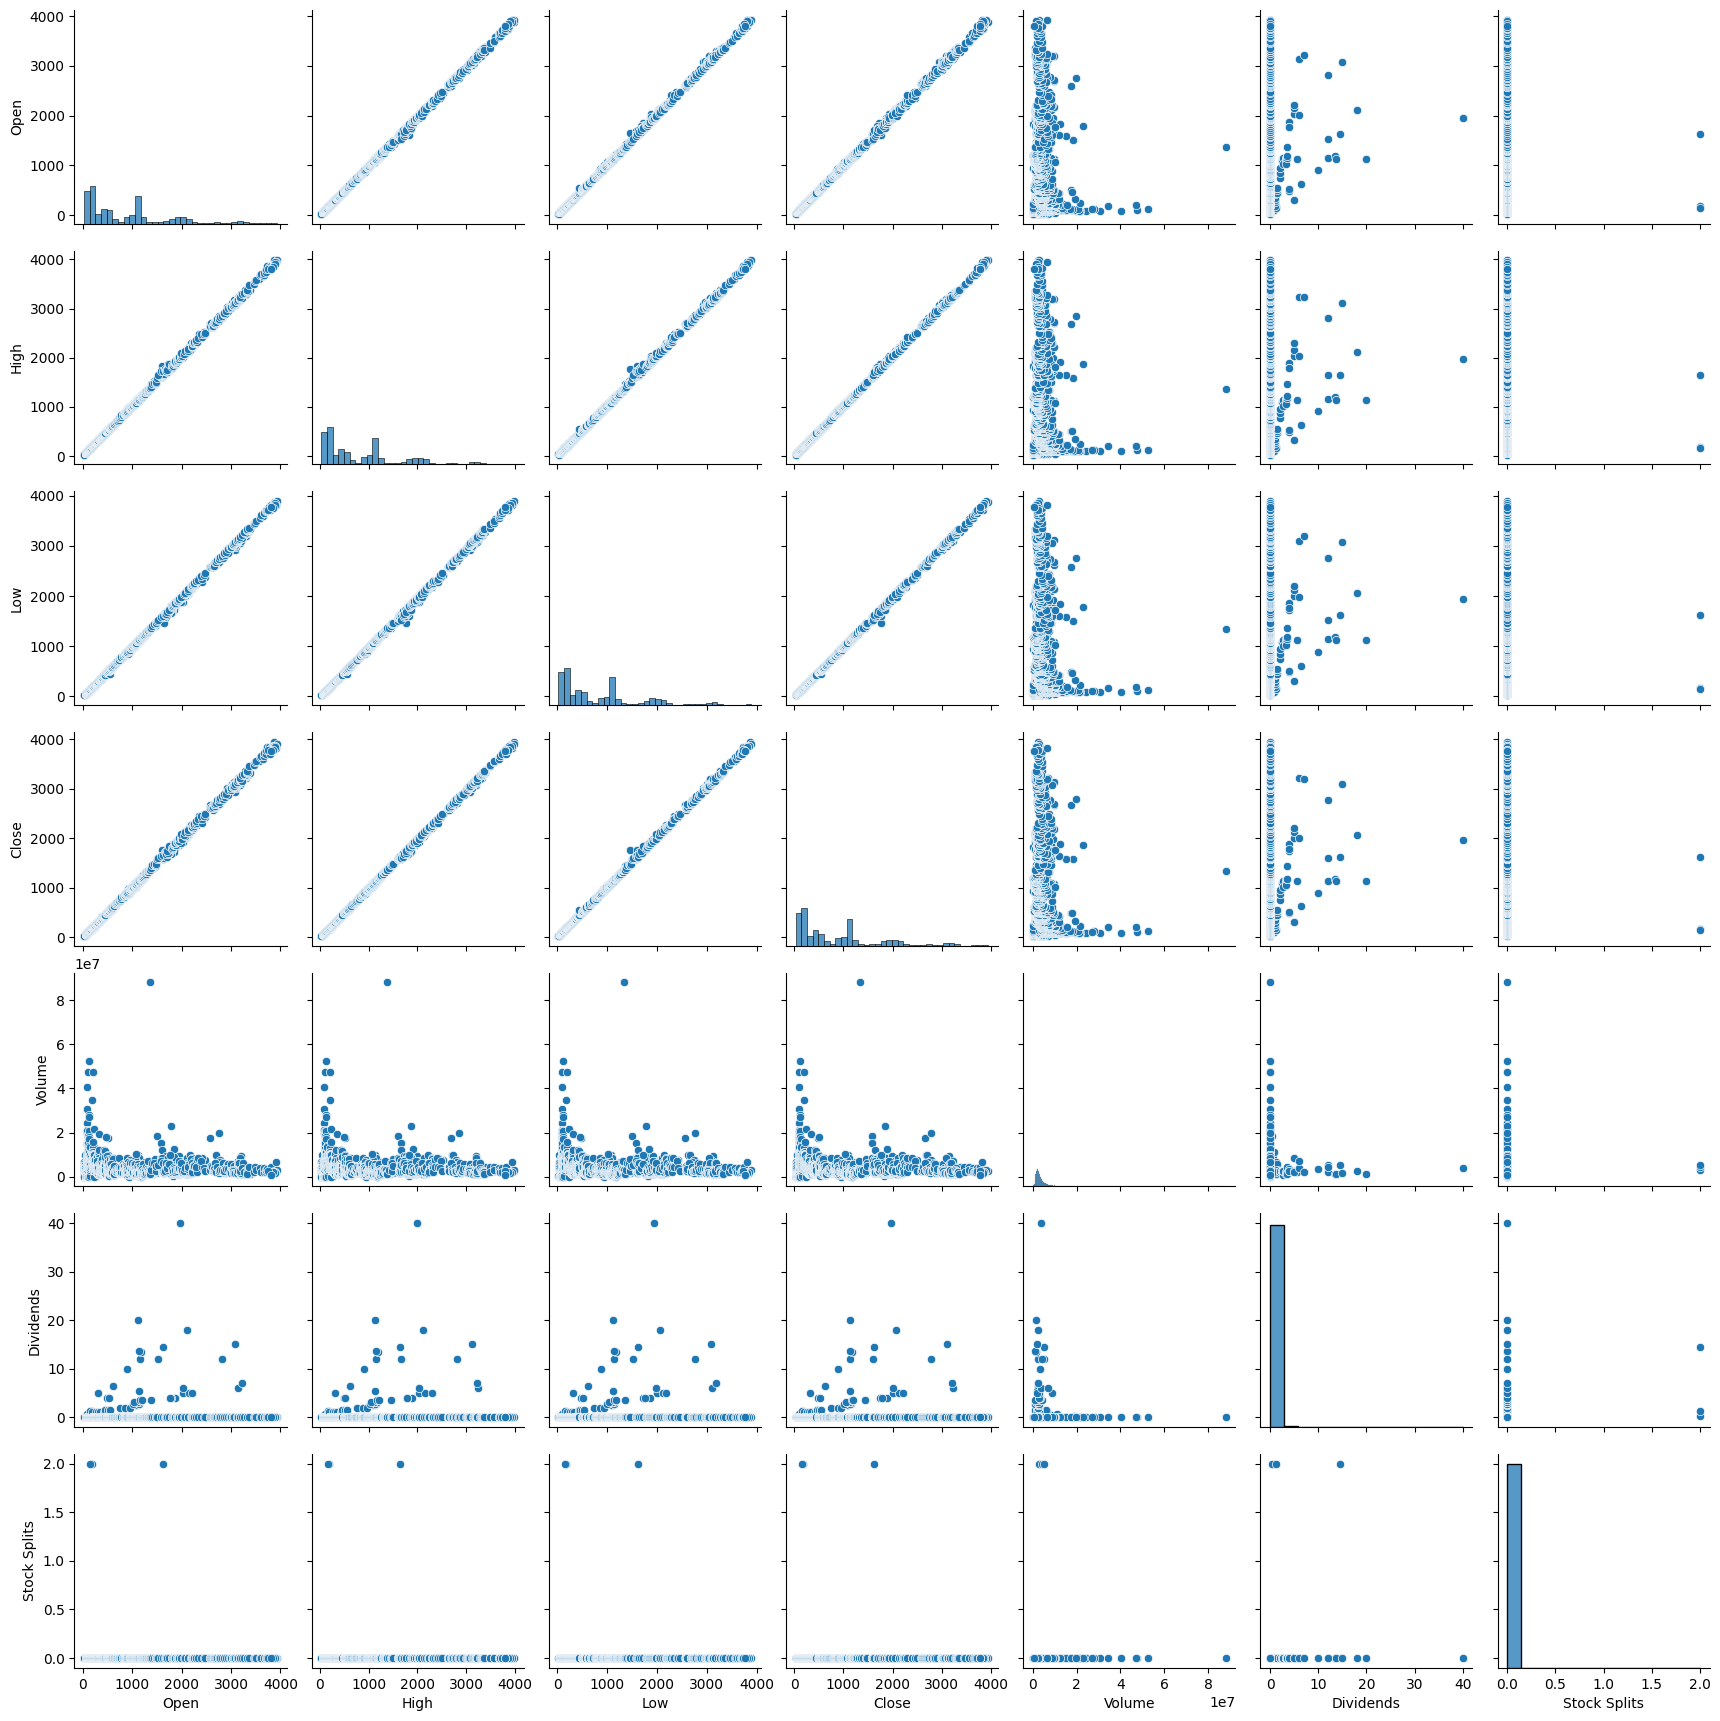

In [222]:
# Using seaborn library for visualization
import seaborn as sns

sns.pairplot(df)

In [223]:
# Correlation of the features
corr = df.corr()
corr

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,1.000000,0.899114,0.899354,0.898962,0.899214,-0.177351,0.062321,-0.005701
Open,0.899114,1.000000,0.999888,0.999892,0.999787,-0.153362,0.059743,-0.006715
High,0.899354,0.999888,1.000000,0.999867,0.999914,-0.150918,0.060044,-0.006597
Low,0.898962,0.999892,0.999867,1.000000,0.999901,-0.154962,0.059916,-0.006622
Close,0.899214,0.999787,0.999914,0.999901,1.000000,-0.152844,0.060179,-0.006635
Volume,-0.177351,-0.153362,-0.150918,-0.154962,-0.152844,1.000000,-0.010332,0.004752
Dividends,0.062321,0.059743,0.060044,0.059916,0.060179,-0.010332,1.000000,0.142493
Stock Splits,-0.005701,-0.006715,-0.006597,-0.006622,-0.006635,0.004752,0.142493,1.000000


In [224]:
# Correlation of the feature with the target
corr_with_close = df.corr()['Close'].sort_values(ascending=False)
corr_with_close

Close           1.000000
High            0.999914
Low             0.999901
Open            0.999787
Date            0.899214
Dividends       0.060179
Stock Splits   -0.006635
Volume         -0.152844
Name: Close, dtype: float64

<Axes: >

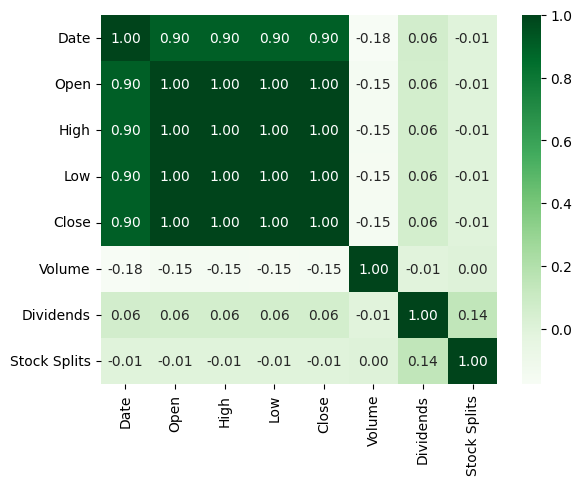

In [245]:
# using seaborn heatmap
sns.heatmap(corr, annot=True, cmap='Greens', fmt='.2f')

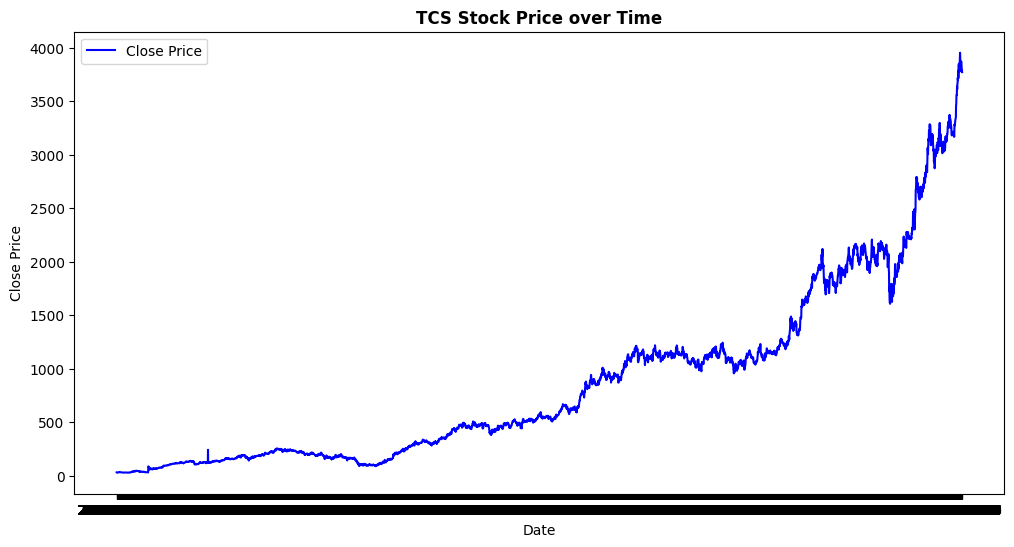

In [249]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('TCS Stock Price over Time', weight="bold")
plt.legend()
plt.show()

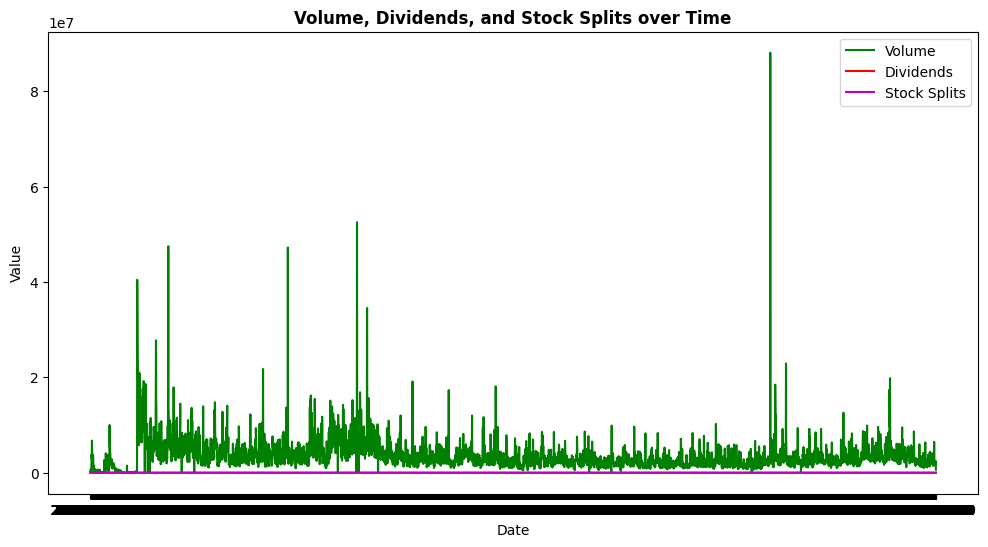

In [250]:
# Volume, Dividends, Stock Splits
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], label='Volume', color='g')
plt.plot(df['Date'], df['Dividends'], label='Dividends', color='r')
plt.plot(df['Date'], df['Stock Splits'], label='Stock Splits', color='m')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Volume, Dividends, and Stock Splits over Time', weight="bold")
plt.legend()
plt.show()

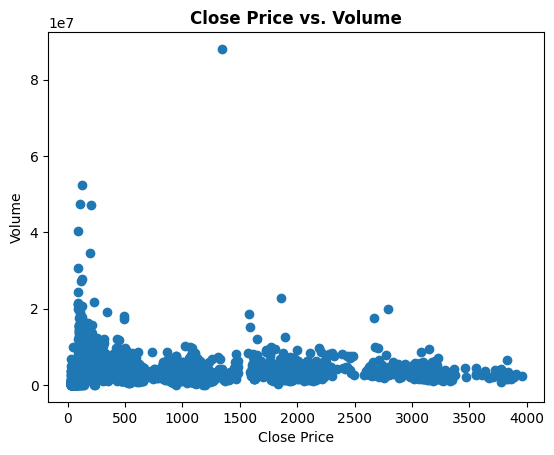

In [251]:
# Close vs Volume
plt.scatter(df['Close'], df['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.title('Close Price vs. Volume', weight="bold")
plt.show()

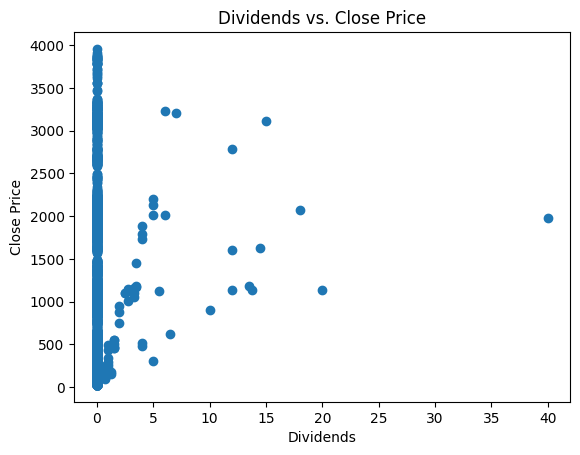

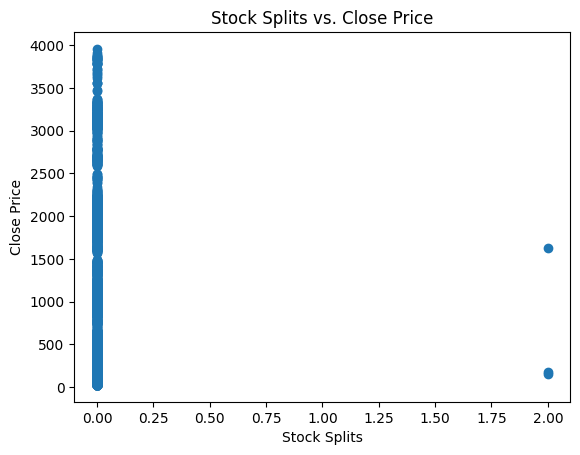

In [252]:
# Dividends vs. Close Price
plt.scatter(df['Dividends'], df['Close'])
plt.xlabel('Dividends')
plt.ylabel('Close Price')
plt.title('Dividends vs. Close Price')
plt.show()

# Stock Splits vs. Close Price
plt.scatter(df['Stock Splits'], df['Close'])
plt.xlabel('Stock Splits')
plt.ylabel('Close Price')
plt.title('Stock Splits vs. Close Price')
plt.show()

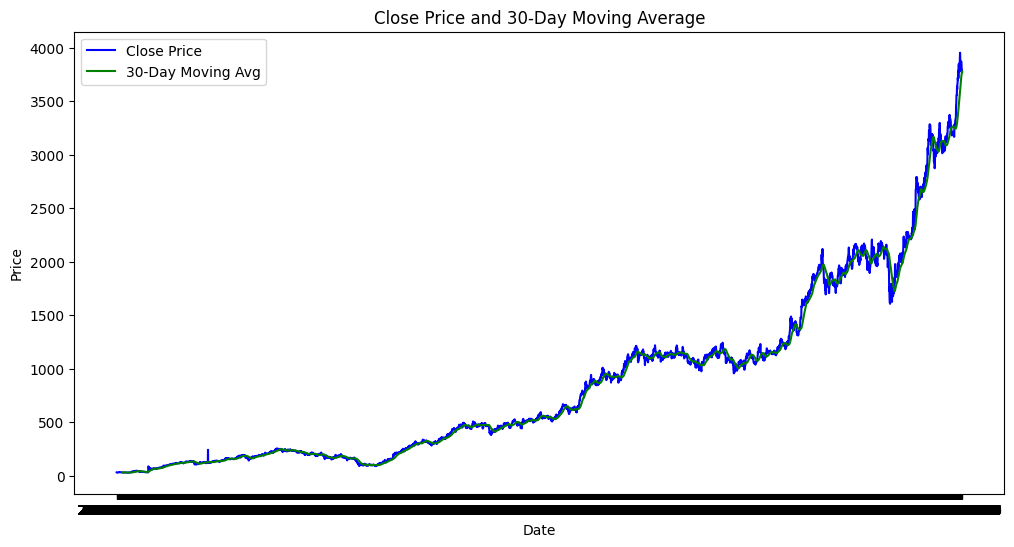

In [277]:
# Moving Average
df['30-Day Moving Avg'] = df['Close'].rolling(window=30).mean()

# Plot Close price and moving average
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='b')
plt.plot(df['Date'], df['30-Day Moving Avg'], label='30-Day Moving Avg', color='g')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price and 30-Day Moving Average')
plt.legend()
plt.show()

In [278]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,30-Day Moving Avg
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0,NaN
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0,NaN
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0,NaN
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0,NaN
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
4458,2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,2320754,0.0,0.0,3736.128320
4459,2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,1673362,0.0,0.0,3752.301652
4460,2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,2253075,0.0,0.0,3762.826652
4461,2021-09-29,3759.800049,3806.000000,3722.149902,3791.899902,2489161,0.0,0.0,3773.458317


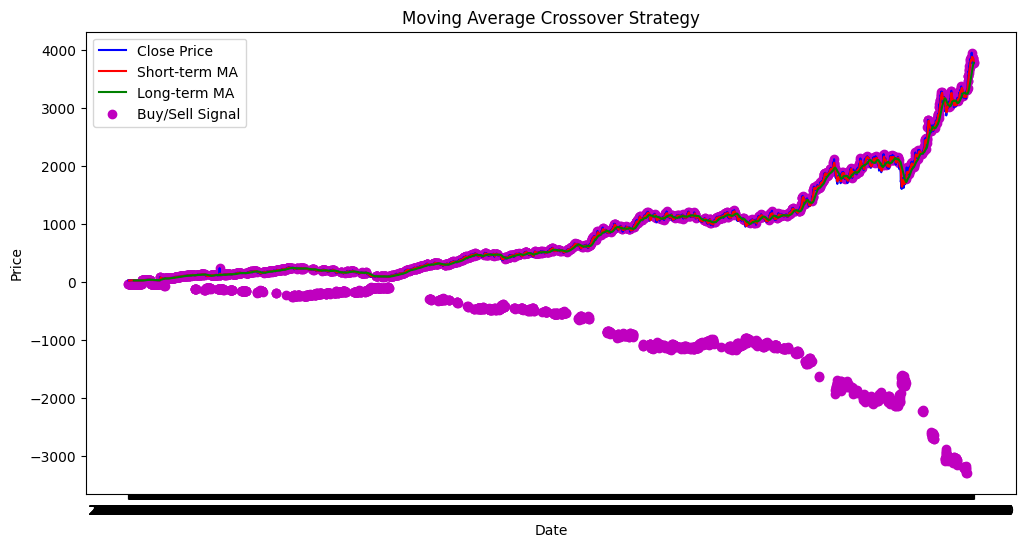

In [255]:
# Moving Average crossover
df['Short_MA'] = df['Close'].rolling(window=5).mean()
df['Long_MA'] = df['Close'].rolling(window=30).mean()

# Creating a trading signals based on moving average crossovers
df['Signal'] = np.where(df['Short_MA'] > df['Long_MA'], 1, -1)

# Plot the strategy signals
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='b')
plt.plot(df['Date'], df['Short_MA'], label='Short-term MA', color='r')
plt.plot(df['Date'], df['Long_MA'], label='Long-term MA', color='g')
plt.scatter(df['Date'], df['Close'] * df['Signal'], label='Buy/Sell Signal', marker='o', color='m')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.show()

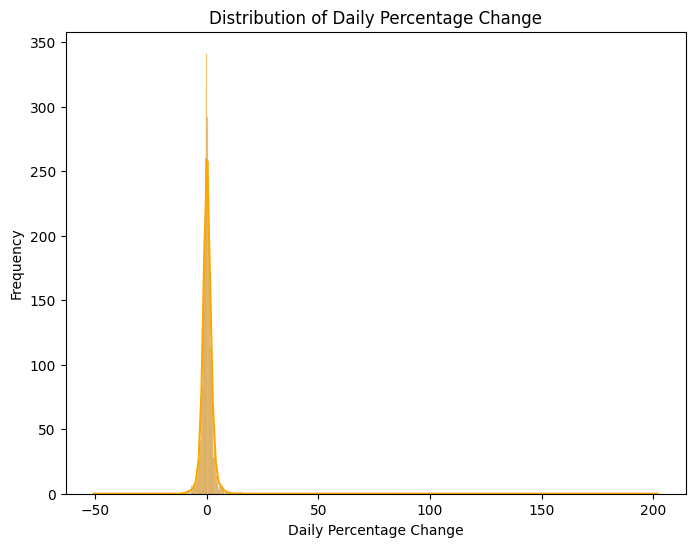

In [256]:
# Daily price change
df['Daily_Price_Change'] = df['Close'].pct_change() * 100

# Distribution of daily percentage change
plt.figure(figsize=(8, 6))
sns.histplot(df['Daily_Price_Change'].dropna(), kde=True, color='orange')
plt.xlabel('Daily Percentage Change')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Percentage Change')
plt.show()

In [257]:
df['Moving_Avg_Close'] = df['Close'].rolling(window=7).mean()

In [258]:
df.shape

(4463, 14)

In [259]:
# Prepare the data for LSTM
X_train = df['Close'].values.reshape(-1, 1)
y_train = df['Close'].shift(-1).dropna().values

# Normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define the test data
test_ratio = 0.2
test_size = int(len(df) * test_ratio)
test_data = df[-test_size:]

# Prepare the data for prediction
X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

In [260]:
# Reshape the data for LSTM
X_train_lstm = X_train_scaled[:-1].reshape(-1, 1, 1)
y_train_lstm = X_train_scaled[1:]

In [261]:
# Using LSTM
import tensorflow as tf

print(tf.__version__)

2.15.0


In [262]:
# Importing important libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [269]:
# Initializing the model
model = Sequential()
model.add(LSTM(50, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [270]:
from tqdm import tqdm

# Train the model with tqdm progress bar
# Set the number of epochs and batch size
epochs = 30
batch_size = 15
for epoch in tqdm(range(epochs)):
    for i in range(0, len(X_train_lstm), batch_size):
        X_batch = X_train_lstm[i:i + batch_size]
        y_batch = y_train_lstm[i:i + batch_size]
        model.train_on_batch(X_batch, y_batch)

# Prepare the data for prediction
X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

100%|██████████| 30/30 [01:21<00:00,  2.70s/it]


In [271]:
# Predicting the data
lstm_predictions = model.predict(X_test_lstm).flatten()
lstm_predictions

28/28 [==============================] - 0s 1ms/step


array([0.36108154, 0.36193386, 0.36081532, 0.36331886, 0.37486488,
       0.37579983, 0.3788294 , 0.37361038, 0.3748708 , 0.37400684,
       0.3743205 , 0.3823853 , 0.37492397, 0.37310734, 0.37032598,
       0.37389436, 0.3760306 , 0.35645878, 0.3564706 , 0.3544344 ,
       0.34922528, 0.34985277, 0.35386032, 0.35290125, 0.34989423,
       0.3483314 , 0.34819525, 0.35182992, 0.35200155, 0.35916382,
       0.3593532 , 0.35931176, 0.3648813 , 0.3639758 , 0.36085072,
       0.36247244, 0.37153324, 0.38633725, 0.38799968, 0.39206356,
       0.38957325, 0.3886859 , 0.39247757, 0.41746563, 0.41819862,
       0.41547963, 0.42547944, 0.43363243, 0.42331657, 0.43278766,
       0.4289654 , 0.4268502 , 0.42672023, 0.4196525 , 0.42204607,
       0.4277306 , 0.4232339 , 0.42390758, 0.42114183, 0.42691523,
       0.4282741 , 0.42802593, 0.42923713, 0.43569982, 0.43004653,
       0.42841598, 0.44124547, 0.4391313 , 0.42923713, 0.4317717 ,
       0.430661  , 0.43030354, 0.42825428, 0.431066  , 0.42566

In [272]:
# Inverse transform
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
lstm_predictions

array([[1444.7681],
       [1448.1162],
       [1443.7223],
       [1453.5566],
       [1498.9114],
       [1502.5841],
       [1514.4847],
       [1493.9835],
       [1498.9347],
       [1495.5409],
       [1496.7731],
       [1528.453 ],
       [1499.1436],
       [1492.0076],
       [1481.0819],
       [1495.0991],
       [1503.4906],
       [1426.6091],
       [1426.6556],
       [1418.657 ],
       [1398.1947],
       [1400.6595],
       [1416.4019],
       [1412.6345],
       [1400.8224],
       [1394.6833],
       [1394.1486],
       [1408.4261],
       [1409.1003],
       [1437.235 ],
       [1437.979 ],
       [1437.8162],
       [1459.6942],
       [1456.1372],
       [1443.8615],
       [1450.2318],
       [1485.8242],
       [1543.9769],
       [1550.5072],
       [1566.4708],
       [1556.6885],
       [1553.2029],
       [1568.0972],
       [1666.2545],
       [1669.1338],
       [1658.4532],
       [1697.7341],
       [1729.7605],
       [1689.238 ],
       [1726.4421],


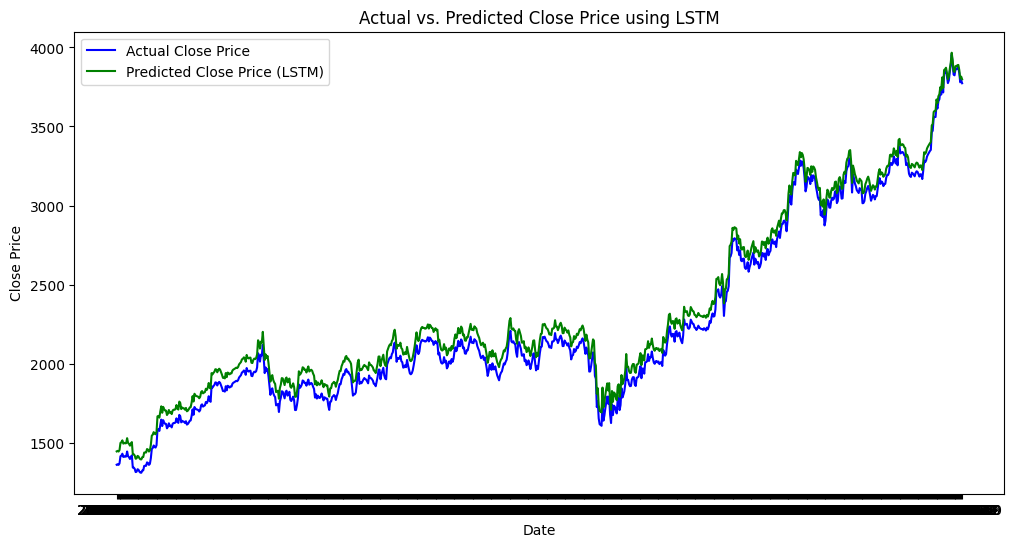

In [274]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Close'], label='Actual Close Price', color='b')
plt.plot(test_data['Date'], lstm_predictions, label='Predicted Close Price (LSTM)', color='g')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price using LSTM')
plt.legend()
plt.show()